In [1]:
# !conda install -y -c conda-forge imbalanced-learn

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
csv_files = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        csv_file = os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))
        csv_files.append(csv_file)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cicids2017/Thursday-WorkingHours-Morning-WebAttacks.csv
/kaggle/input/cicids2017/Thursday-WorkingHours-Afternoon-Infilteration.csv
/kaggle/input/cicids2017/Wednesday-workingHours.csv
/kaggle/input/cicids2017/Friday-WorkingHours-Afternoon-DDos.csv
/kaggle/input/cicids2017/Friday-WorkingHours-Afternoon-PortScan.csv
/kaggle/input/cicids2017/Friday-WorkingHours-Morning.csv
/kaggle/input/cicids2017/Tuesday-WorkingHours.csv
/kaggle/input/cicids2017/Monday-WorkingHours.csv


In [3]:
#pd.read_csv(csv_files[0])

In [4]:
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
df.columns = df.columns.str.strip()
print("original length of df:", len(df))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print("after droping null values, the length of df:", len(df))
df_experiment = df.loc[df.Label.str.contains(pat='DoS|BENIGN',na=False)]
df_experiment = df_experiment.loc[~(df_experiment.Label =="DoS Slowhttptest") ]
del df

original length of df: 2830743
after droping null values, the length of df: 2827876


In [5]:
# data split
from sklearn.model_selection import train_test_split
from collections import Counter
y = df_experiment.Label
X = df_experiment.drop(columns='Label')
labels = y.unique()
classes = y.nunique()
print(X.shape)
print("number of labels:", classes)
print("instances per label\n", y.value_counts())
print("labels:", labels)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
# print(len(df_experiment))
# print(df_experiment.Label.nunique())
# print(df_experiment.Label.value_counts())
print("after spliting the data:\n")
print("training data length:", len(X_train))
print("test data length:", len(X_test))
# print(y_train.nunique())
# print(y_train.value_counts())

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
# enc = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()
le = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("instances per label in training set\n", y_train.value_counts())
y_train = le.fit_transform(y_train)
print("instances per label in test set\n", y_test.value_counts())
y_test = le.transform(y_test)

print(X_train.shape)
print(X_test.shape)
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)


# training data sampling
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
# from collections import Counter
# over = SMOTE(sampling_strategy='not majority', n_jobs=-1)
# under = RandomUnderSampler(sampling_strategy=
#                            {labels_dict['BENIGN']:200000})
# steps = [('u', under), ('o', over)]
# pipeline = Pipeline(steps=steps)
# X_train, y_train = pipeline.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

(2645558, 78)
number of labels: 5
instances per label
 BENIGN           2271320
DoS Hulk          230124
DDoS              128025
DoS GoldenEye      10293
DoS slowloris       5796
Name: Label, dtype: int64
labels: ['BENIGN' 'DoS slowloris' 'DoS Hulk' 'DoS GoldenEye' 'DDoS']
after spliting the data:

training data length: 1984168
test data length: 661390
instances per label in training set
 BENIGN           1703489
DoS Hulk          172593
DDoS               96019
DoS GoldenEye       7720
DoS slowloris       4347
Name: Label, dtype: int64
instances per label in test set
 BENIGN           567831
DoS Hulk          57531
DDoS              32006
DoS GoldenEye      2573
DoS slowloris      1449
Name: Label, dtype: int64
(1984168, 78)
(661390, 78)
{'BENIGN': 0, 'DDoS': 1, 'DoS GoldenEye': 2, 'DoS Hulk': 3, 'DoS slowloris': 4}
Counter({0: 1703489, 3: 172593, 1: 96019, 2: 7720, 4: 4347})


In [6]:
X.shape

(2645558, 78)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645558 entries, 0 to 2830742
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [8]:
X.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,...,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06,2.645558e+06
mean,8.085944e+03,1.566122e+07,9.866896e+00,1.097233e+01,5.755746e+02,1.725618e+04,2.204270e+02,1.971582e+01,6.164984e+01,7.331588e+01,...,5.751620e+00,-2.935840e+03,7.908158e+04,4.353710e+04,1.553962e+05,5.460324e+04,8.831635e+06,5.248572e+05,9.221537e+06,8.420222e+06
std,1.858030e+04,3.449557e+07,7.754190e+02,1.031676e+03,9.858908e+03,2.340901e+06,7.367535e+02,5.923429e+01,1.902420e+02,2.898308e+02,...,6.582917e+02,1.122321e+06,6.283133e+05,4.029670e+05,1.032200e+06,5.505570e+05,2.425708e+07,4.741867e+06,2.500504e+07,2.399047e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.860000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,4.672800e+04,2.000000e+00,2.000000e+00,6.600000e+01,1.450000e+02,3.900000e+01,6.000000e+00,3.600000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,4.714936e+06,5.000000e+00,5.000000e+00,3.100000e+02,6.920000e+02,1.930000e+02,3.700000e+01,5.100000e+01,6.346321e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,4.672000e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [9]:
# Autoencoder model to extract latent features

from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=3, mode='min')

input_shape = X_train.shape[1]
print(f"input shape: {input_shape}")
encoding_dim = 10
encoder = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape, )),
    Dense(encoding_dim, activation='relu')
])
decoder = Sequential([
    Dense(32, activation='relu', input_shape=(encoding_dim,)),
    Dense(input_shape)
])
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer='Adam')
history = autoencoder.fit(X_train, X_train, batch_size=64,
                          epochs=20, validation_split=0.2)

input shape: 78


2021-10-22 00:24:31.973119: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:24:32.069571: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:24:32.070398: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:24:32.072359: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/20
24803/24803 [==============================] - 67s 3ms/step - loss: 5.9146e-04 - val_loss: 1.6801e-04
Epoch 2/20
24803/24803 [==============================] - 63s 3ms/step - loss: 1.4042e-04 - val_loss: 1.2233e-04
Epoch 3/20
24803/24803 [==============================] - 63s 3ms/step - loss: 1.1493e-04 - val_loss: 1.1955e-04
Epoch 4/20
24803/24803 [==============================] - 67s 3ms/step - loss: 1.0342e-04 - val_loss: 9.2767e-05
Epoch 5/20
24803/24803 [==============================] - 67s 3ms/step - loss: 9.4601e-05 - val_loss: 9.3726e-05
Epoch 6/20
24803/24803 [==============================] - 64s 3ms/step - loss: 8.9639e-05 - val_loss: 8.8131e-05
Epoch 7/20
24803/24803 [==============================] - 65s 3ms/step - loss: 8.4966e-05 - val_loss: 8.2583e-05
Epoch 8/20
24803/24803 [==============================] - 68s 3ms/step - loss: 8.0437e-05 - val_loss: 1.1127e-04
Epoch 9/20
24803/24803 [==============================] - 65s 3ms/step - loss: 7.7435e-05 - val_

In [10]:
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)

2021-10-22 00:47:11.525062: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 619060416 exceeds 10% of free system memory.


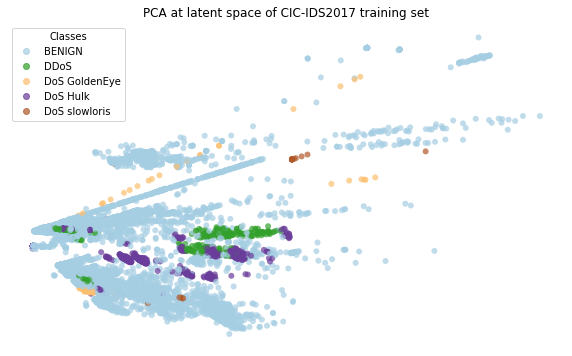

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

X_train_pca, y_train_pca = resample(
    X_train_encode, y_train, n_samples=30000, random_state=42, stratify=y_train)
pca = PCA(n_components=2)
projected = pca.fit_transform(X_train_pca)
fig, ax = plt.subplots(figsize=(10,6))
scat = ax.scatter(projected[:, 0], projected[:, 1],
            c=y_train_pca, edgecolor='none', cmap="Paired", alpha=0.7)
plt.legend(handles=scat.legend_elements()[0], labels=list(le.classes_), loc="upper left", title="Classes")
plt.axis('off')
plt.title("PCA at latent space of CIC-IDS2017 training set")
plt.show()

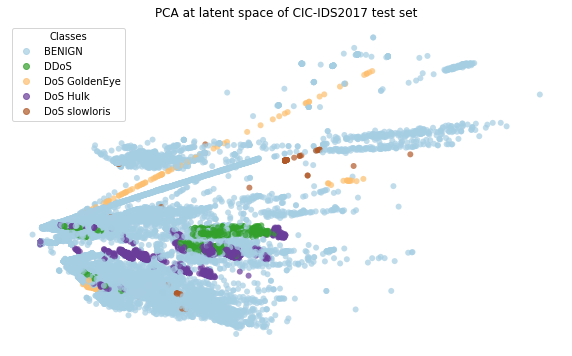

In [12]:
X_test_pca, y_test_pca = resample(
    X_test_encode, y_test, n_samples=100000, random_state=42, stratify=y_test)
pca = PCA(n_components=2)
projected = pca.fit_transform(X_test_pca)
fig, ax = plt.subplots(figsize=(10,6))
scat = ax.scatter(projected[:, 0], projected[:, 1],
            c=y_test_pca, edgecolor='none', cmap="Paired", alpha=0.7)
plt.legend(handles=scat.legend_elements()[0], labels=list(le.classes_), loc="upper left", title="Classes")
plt.axis('off')
plt.title("PCA at latent space of CIC-IDS2017 test set")
plt.show()

In [13]:
classifier = Sequential()
classifier.add(Input(shape=(encoding_dim,)))
classifier.add(Dense(32, activation='relu'))
classifier.add(Dense(classes, activation='softmax'))
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = classifier.fit(X_train_encode,y_train, batch_size=64, epochs=30, 
                         validation_split=0.2, callbacks=[callback])

Epoch 1/30
24803/24803 [==============================] - 59s 2ms/step - loss: 0.1166 - accuracy: 0.9632 - val_loss: 0.0753 - val_accuracy: 0.9743
Epoch 2/30
24803/24803 [==============================] - 63s 3ms/step - loss: 0.0679 - accuracy: 0.9765 - val_loss: 0.0656 - val_accuracy: 0.9765
Epoch 3/30
24803/24803 [==============================] - 64s 3ms/step - loss: 0.0611 - accuracy: 0.9784 - val_loss: 0.0603 - val_accuracy: 0.9783
Epoch 4/30
24803/24803 [==============================] - 65s 3ms/step - loss: 0.0575 - accuracy: 0.9792 - val_loss: 0.0576 - val_accuracy: 0.9792
Epoch 5/30
24803/24803 [==============================] - 61s 2ms/step - loss: 0.0552 - accuracy: 0.9797 - val_loss: 0.0563 - val_accuracy: 0.9790
Epoch 6/30
24803/24803 [==============================] - 66s 3ms/step - loss: 0.0534 - accuracy: 0.9800 - val_loss: 0.0563 - val_accuracy: 0.9792
Epoch 7/30
24803/24803 [==============================] - 61s 2ms/step - loss: 0.0522 - accuracy: 0.9802 - val_loss: 0

In [14]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [15]:
# predicting on training set
y_train_pred_prob = classifier.predict(X_train_encode)
y_test_pred_prob = classifier.predict(X_test_encode)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

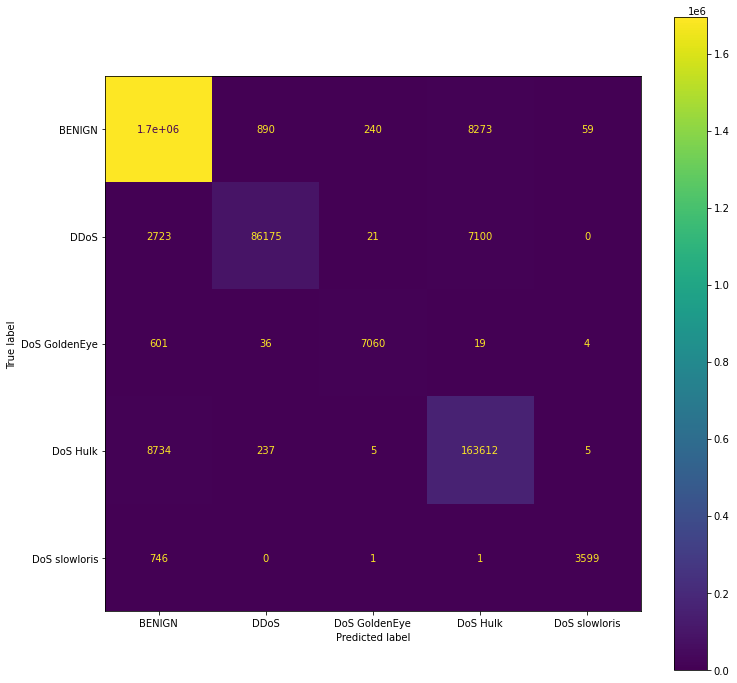

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_train, y_train_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.show()

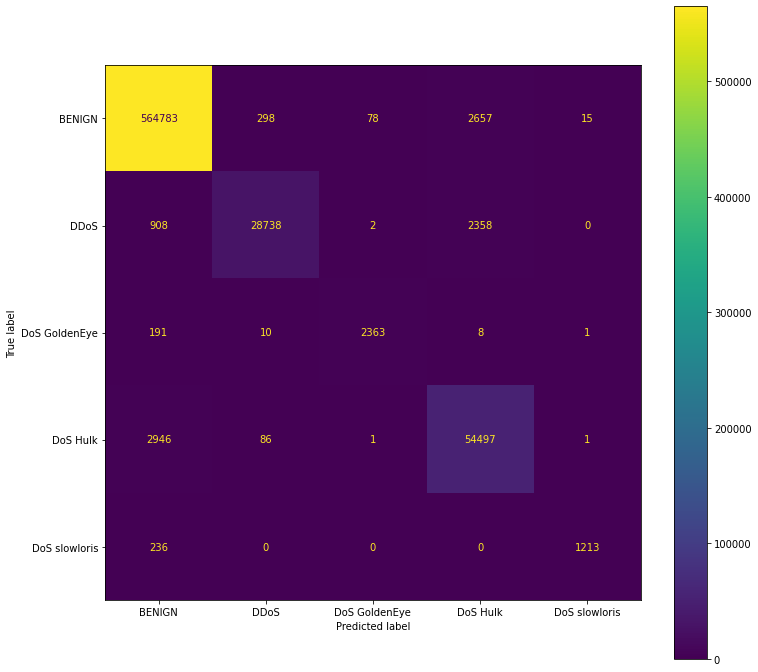

In [17]:
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.show()

In [18]:
def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance

In [19]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y, labels, title): 
    y_cat = to_categorical(y)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
#     print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

In [20]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(y_train)
print(classification_report(y_train_labels, y_train_pred_labels))
performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
performance

               precision    recall  f1-score   support

       BENIGN       0.99      0.99      0.99   1703489
         DDoS       0.99      0.90      0.94     96019
DoS GoldenEye       0.96      0.91      0.94      7720
     DoS Hulk       0.91      0.95      0.93    172593
DoS slowloris       0.98      0.83      0.90      4347

     accuracy                           0.99   1984168
    macro avg       0.97      0.92      0.94   1984168
 weighted avg       0.99      0.99      0.98   1984168



,accuracy,precision,recall,f1_score
BENIGN,0.9888,0.9944,0.9925,0.9935
DDoS,0.9945,0.8975,0.9867,0.94
DoS GoldenEye,0.9995,0.9145,0.9636,0.9384
DoS Hulk,0.9877,0.948,0.914,0.9307
DoS slowloris,0.9996,0.8279,0.9815,0.8982


In [21]:
y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_true_labels = le.inverse_transform(y_test)
print(classification_report(y_test_true_labels,y_test_pred_labels))

               precision    recall  f1-score   support

       BENIGN       0.99      0.99      0.99    567831
         DDoS       0.99      0.90      0.94     32006
DoS GoldenEye       0.97      0.92      0.94      2573
     DoS Hulk       0.92      0.95      0.93     57531
DoS slowloris       0.99      0.84      0.91      1449

     accuracy                           0.99    661390
    macro avg       0.97      0.92      0.94    661390
 weighted avg       0.99      0.99      0.99    661390



In [22]:
performance = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance

,accuracy,precision,recall,f1_score
BENIGN,0.9889,0.9925,0.9946,0.9936
DDoS,0.9945,0.9865,0.8979,0.9401
DoS GoldenEye,0.9996,0.9669,0.9184,0.942
DoS Hulk,0.9878,0.9156,0.9473,0.9312
DoS slowloris,0.9996,0.9862,0.8371,0.9056


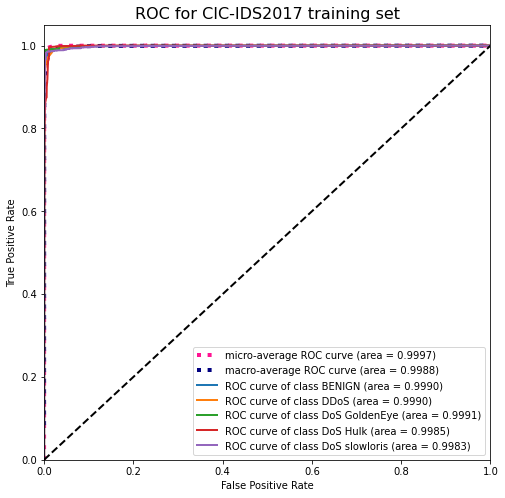

In [23]:
RoC_Curve(y_train_pred_prob, y_train, le.classes_, title='ROC for CIC-IDS2017 training set')

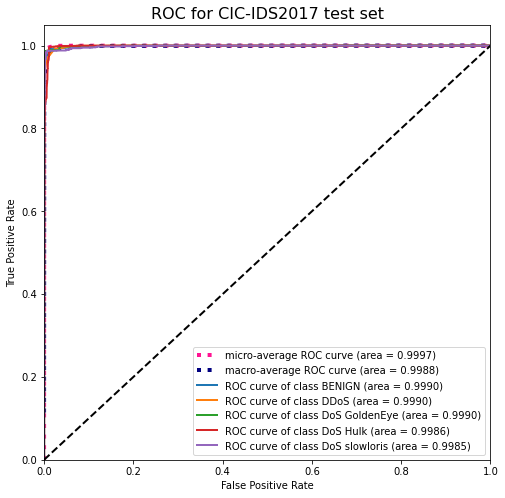

In [24]:
RoC_Curve(y_test_pred_prob, y_test, le.classes_, title='ROC for CIC-IDS2017 test set')